## Stiching Python object

- We use the previously stiching coordinates to stitch the segmented cells from segmentation masks of each position
- We use the previously stiching coordinates to stitch the detected point cloud of each round to ensure not counting twice the same spots

- For visualisation purposes it also possible to stitch fish signal images


## Stitching of segmentation mask

Cell of each position was segmented independly for memory optmization. When stitching the segmentation mask, the overlapping cells from different position are merged.\
When merging segmented cells, their instance cell segmentation ID changes from the one from the local position mask to the global stitched mask.

The fonction **stich_segmask** will stitch segmentation mask using coordinate previously computed

**stich_segmask** saves the new stitched mask in a separated folder and returns a dataframe indicating the correspondance between instance cell segmentation ID between till masks and stitched masks

In [1]:
import numpy as np
from pathlib import Path
from autofish_analysis.stitching import stich_segmask

In [2]:
## Path to the folder containing all the rounds
folder_of_rounds = "/media/tom/Transcend/autofish_test_stiching/"

## path to the mask of the position tiles
path_mask = "/media/tom/Transcend/autofish_test_stiching/segmentation_mask"

## indicate where to save the stiched mask
path_to_save_mask = "/media/tom/Transcend/autofish_test_stiching/segmentation_mask_stitch"

## overlap threshold above two cells are considered the same when stitching
iou_threshold = 0.10 

### load previously computed stitching coordinates
dict_stitch_img = np.load(Path(folder_of_rounds) / "dict_stitch_img.npy",
                          allow_pickle=True).item()

## image dimention parameters
image_shape=[38, 2048, 2048]
nb_tiles_x=3
nb_tiles_y=1

In [3]:
dict_stitch_img = np.load(Path(folder_of_rounds) / "dict_stitch_img.npy",
                          allow_pickle=True).item()
df_matching_new_cell_label = stich_segmask(dict_stitch_img, 
                  path_mask = path_mask,
                  path_to_save_mask = path_to_save_mask,
                  image_shape=image_shape,
                  nb_tiles_x = nb_tiles_x,
                  nb_tiles_y=nb_tiles_y,
                  iou_threshold = 0.10)

(42, 3048, 7144)


  0%|                                                                                                                                                                                                            | 0/11 [00:00<?, ?it/s]

r1_pos0.tif
present_cell [0]


  9%|█████████████████▊                                                                                                                                                                                  | 1/11 [00:22<03:44, 22.43s/it]

r1_pos1.tif
present_cell [ 0  5 10 14 15 18 24 29 31 36]
unique_inter_cell [ 0 39 45 47 51] , cell 5
iou 0.052831216329324575 cell 5 inter_cell 2
iou 0.6520573390962388 cell 5 inter_cell 8
iou MATCH  0.6520573390962388
iou 0.006522792572996467 cell 5 inter_cell 10
iou 0.00036300617945740534 cell 5 inter_cell 14
unique_inter_cell [ 0  5 51 57 58] , cell 10


/home/tom/Bureau/phd/autofish_pckg/autofish_analysis/stitching.py:308: RuntimeWarning: overflow encountered in ushort_scalars
  


iou 0.0035082132118082823 cell 10 inter_cell 65504
iou 0.7218042422236337 cell 10 inter_cell 14
iou MATCH  0.7218042422236337
iou 0.027823552980693087 cell 10 inter_cell 20
iou 0.0010192695526887792 cell 10 inter_cell 21
unique_inter_cell [ 0 10 57 58] , cell 14
iou 0.0006139902402293077 cell 14 inter_cell 65509
iou 0.002907101311014734 cell 14 inter_cell 20
iou 0.4339208548113489 cell 14 inter_cell 21
iou MATCH  0.4339208548113489
unique_inter_cell [ 0 62] , cell 15
iou 0.0024582217046347664 cell 15 inter_cell 25
unique_inter_cell [  0  62  65 105] , cell 18
iou 0.6008000474706576 cell 18 inter_cell 25
iou MATCH  0.6008000474706576
iou 0.0023172277395775488 cell 18 inter_cell 28
iou 0.017178904129685323 cell 18 inter_cell 68
unique_inter_cell [ 0 69] , cell 24
iou 0.7412302095263761 cell 24 inter_cell 32
iou MATCH  0.7412302095263761
unique_inter_cell [ 0  5 39] , cell 29
iou 0.00019666203810365904 cell 29 inter_cell 65504
iou 0.16921181478160258 cell 29 inter_cell 2
iou MATCH  0.1692

 18%|███████████████████████████████████▋                                                                                                                                                                | 2/11 [01:00<04:44, 31.62s/it]

iou 0.030121856295461255 cell 36 inter_cell 65528
r1_pos2.tif
present_cell [  0  38  49  55  60  63  64  82  88  95  97 101 107 109 117 123 130]
unique_inter_cell [  0 136] , cell 38
iou 0.2785437918592073 cell 38 inter_cell 3
iou MATCH  0.2785437918592073
unique_inter_cell [  0 143 147] , cell 49
iou 0.30001758771809933 cell 49 inter_cell 10
iou MATCH  0.30001758771809933
iou 0.0005893320680130773 cell 49 inter_cell 14
unique_inter_cell [  0  49 147 149] , cell 55
iou 0.0011464879862457214 cell 55 inter_cell 65452
iou 0.13053105751142285 cell 55 inter_cell 14
iou MATCH  0.13053105751142285
iou 8.411534316431407e-05 cell 55 inter_cell 16
unique_inter_cell [  0  55 149 152 153 156] , cell 60
iou 0.005783429338520107 cell 60 inter_cell 65458
iou 0.001200403697129746 cell 60 inter_cell 16
iou 0.7544317757602227 cell 60 inter_cell 19
iou MATCH  0.7544317757602227
iou 7.74581588776571e-06 cell 60 inter_cell 20
iou 0.0007951077748974302 cell 60 inter_cell 23
unique_inter_cell [  0  60 153 15

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [01:44<00:00,  9.53s/it]

iou 2.8397078118143382e-05 cell 130 inter_cell 65485


(42, 3048, 7144)


  0%|                                                                                                                                                                                                            | 0/11 [00:00<?, ?it/s]

r1_pos6.tif
present_cell [0]


 73%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                     | 8/11 [00:35<00:13,  4.50s/it]

r1_pos7.tif
present_cell [ 0  3  4 11 13 19 21 24]
unique_inter_cell [ 0 55 58 60] , cell 3
iou 0.5985103672712052 cell 3 inter_cell 4
iou MATCH  0.5985103672712052
iou 0.006620167706341709 cell 3 inter_cell 7
iou 6.943864199381996e-05 cell 3 inter_cell 9
unique_inter_cell [ 0  3 58] , cell 4


/home/tom/Bureau/phd/autofish_pckg/autofish_analysis/stitching.py:308: RuntimeWarning: overflow encountered in ushort_scalars
  


iou 0.00013420362349783445 cell 4 inter_cell 65488
iou 0.001375214922904839 cell 4 inter_cell 7
unique_inter_cell [ 0  3 58 60] , cell 11
iou 0.07000856751300627 cell 11 inter_cell 65488
iou 0.6457453949812411 cell 11 inter_cell 7
iou MATCH  0.6457453949812411
iou 0.0016713453733820025 cell 11 inter_cell 9
unique_inter_cell [ 0 60 64] , cell 13
iou 0.015109868938990882 cell 13 inter_cell 9
iou 0.2603686207885324 cell 13 inter_cell 13
iou MATCH  0.2603686207885324
unique_inter_cell [ 0 69] , cell 19
iou 0.44480351682032676 cell 19 inter_cell 18
iou MATCH  0.44480351682032676
unique_inter_cell [ 0 73] , cell 21
iou 0.35652904442078237 cell 21 inter_cell 22
iou MATCH  0.35652904442078237
unique_inter_cell [0] , cell 24


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                   | 9/11 [01:06<00:16,  8.38s/it]

r1_pos8.tif
present_cell [ 0 52 61 62 67 72 75 76 80 93]
unique_inter_cell [  0 123] , cell 52
iou 0.675012827597095 cell 52 inter_cell 4
iou MATCH  0.675012827597095
unique_inter_cell [  0 126 127 132 133 153 172] , cell 61
iou 3.515961307771061e-05 cell 61 inter_cell 7
iou 0.0002105162208595845 cell 61 inter_cell 8
iou 0.8428011880249575 cell 61 inter_cell 13
iou MATCH  0.8428011880249575
iou 0.002715686706083358 cell 61 inter_cell 14
iou 0.004132472106512278 cell 61 inter_cell 34
iou 0.000556784287117851 cell 61 inter_cell 53
unique_inter_cell [  0  61 127 133 153] , cell 62
iou 0.013626544548726818 cell 62 inter_cell 65478
iou 9.078318082704612e-06 cell 62 inter_cell 8
iou 0.3198043561117179 cell 62 inter_cell 14
iou MATCH  0.3198043561117179
iou 0.00046423276921193766 cell 62 inter_cell 34
unique_inter_cell [  0 140] , cell 67
iou 0.5303075160106285 cell 67 inter_cell 21
iou MATCH  0.5303075160106285
unique_inter_cell [  0  67 145] , cell 72
iou 0.00016415771350176763 cell 72 inte

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [01:45<00:00,  9.55s/it]

iou 0.17875930521091812 cell 93 inter_cell 34
iou MATCH  0.17875930521091812


In [4]:
df_matching_new_cell_label['img1']

,cell_id_local_position,cell_id_stitched_mask,pos
0,0,0,pos6
1,1,1,pos6
2,2,2,pos6
3,3,3,pos6
4,4,4,pos6
...,...,...,...
134,58,177,pos8
135,59,178,pos8
136,63,182,pos8
137,64,183,pos8


**the cell_id_local_position** is the cell ID in the orignal segmented tile at postion X\
**the cell_id_stitched_mask** is the cell ID in the stitched mask

In [6]:
np.save(Path(folder_of_rounds) / "df_matching_new_cell_label.npy", df_matching_new_cell_label)

## Stitching of point clouds

The function **dico_spots_registered_stitch_df** stitches the point cloud from the different tiles


In [11]:
import autofish_analysis.stitching
importlib.reload(autofish_analysis.stitching)
from autofish_analysis.stitching import  stich_dico_spots

In [12]:


## define the correspondance between round and RNA species
dict_round_gene={
        'r1': "gene1",
        'r3': "gene2",
        }


### load previously registered spots detection
dict_spots_registered_df = np.load(Path(folder_of_rounds) / "dict_spots_registered_df_r1_with_cell.npy",
                                allow_pickle=True).item()



dico_spots_registered_stitch_df = stich_dico_spots(
    dict_spots_registered_df = dict_spots_registered_df,
                     dict_stitch_img = dict_stitch_img,
                     dict_round_gene=dict_round_gene,
                     image_shape=image_shape,
                 nb_tiles_x=nb_tiles_x,
                 nb_tiles_y=nb_tiles_y,
                 df_matching_new_cell_label = df_matching_new_cell_label)

np.save(Path(folder_of_rounds) /  "dico_spots_registered_stitch_df.npy",
        dico_spots_registered_stitch_df)


img0
pos2
pos1
pos0
img1
pos8
pos7
pos6


In [13]:
dico_spots_registered_stitch_df['img0']

,x,y,z,round_name,gene,cell_assignment,image_position
0,1720.000000,1122.000000,6.0,r1,gene1,133,pos2
1,304.000000,7.000000,8.0,r1,gene1,133,pos2
2,714.000000,10.000000,8.0,r1,gene1,137,pos2
3,792.000000,15.000000,8.0,r1,gene1,137,pos2
4,2047.000000,17.000000,8.0,r1,gene1,38,pos2
...,...,...,...,...,...,...,...
22032,4589.833607,262.618102,37.0,r3,gene2,35,pos0
22033,5305.833607,713.618102,37.0,r3,gene2,37,pos0
22034,4811.833607,1596.618102,37.0,r3,gene2,16,pos0
22035,4782.833607,1630.618102,37.0,r3,gene2,16,pos0


### Stich fluorescent signal

Stitching the fish images is only for vizualisation purposes as all analysis are computed on local postion tile.
It enable to reduce computational cost. 

Still it is possible to stitch fish signal of the reference round using the previously computed stitching coordiante

In [17]:
import autofish_analysis.stitching
importlib.reload(autofish_analysis.stitching)
from autofish_analysis.stitching import  stich_from_dico_img

In [19]:
image_shape=[38, 2048, 2048]
nb_tiles_x=3
nb_tiles_y=1
for image_name in dict_stitch_img:
    dict_stitch = dict_stitch_img[image_name]
    final_masks = stich_from_dico_img(dict_stitch,
                      path_mask = "/media/tom/Transcend/autofish_test_stiching/r1",
                        regex = "*_ch0*tif*", ## regular expression for the images to stitch
                        image_shape=image_shape,
                            nb_tiles_x=nb_tiles_x,
                            nb_tiles_y=nb_tiles_y,)
    
    np.save(Path(folder_of_rounds) / Path("/media/tom/Transcend/autofish_test_stiching/stitching_r1") / image_name,
            final_masks)


  0%|                                                                                                                                                                                                            | 0/11 [00:00<?, ?it/s]

r1_pos0_ch0.tif in the folder
r1_pos0_ch0.tif
r1_pos0_ch0.tif will be stitched
r1_pos0_ch0.tif (38, 2048, 2048)
(38, 2048, 2048)


  9%|█████████████████▊                                                                                                                                                                                  | 1/11 [00:00<00:04,  2.49it/s]

r1_pos10_ch0.tif in the folder
r1_pos1_ch0.tif in the folder
r1_pos1_ch0.tif
r1_pos1_ch0.tif will be stitched


 27%|█████████████████████████████████████████████████████▍                                                                                                                                              | 3/11 [00:00<00:02,  3.71it/s]

r1_pos1_ch0.tif (38, 2048, 2048)
(38, 2048, 2048)
r1_pos2_ch0.tif in the folder
r1_pos2_ch0.tif
r1_pos2_ch0.tif will be stitched


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:01<00:00,  8.56it/s]

r1_pos2_ch0.tif (38, 2048, 2048)
(38, 2048, 2048)
r1_pos3_ch0.tif in the folder
r1_pos4_ch0.tif in the folder
r1_pos5_ch0.tif in the folder
r1_pos6_ch0.tif in the folder
r1_pos7_ch0.tif in the folder
r1_pos8_ch0.tif in the folder
r1_pos9_ch0.tif in the folder



  0%|                                                                                                                                                                                                            | 0/11 [00:00<?, ?it/s]

r1_pos0_ch0.tif in the folder
r1_pos10_ch0.tif in the folder
r1_pos1_ch0.tif in the folder
r1_pos2_ch0.tif in the folder
r1_pos3_ch0.tif in the folder
r1_pos4_ch0.tif in the folder
r1_pos5_ch0.tif in the folder
r1_pos6_ch0.tif in the folder
r1_pos6_ch0.tif
r1_pos6_ch0.tif will be stitched
r1_pos6_ch0.tif (38, 2048, 2048)
(38, 2048, 2048)


 73%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                     | 8/11 [00:09<00:03,  1.16s/it]

r1_pos7_ch0.tif in the folder
r1_pos7_ch0.tif
r1_pos7_ch0.tif will be stitched
r1_pos7_ch0.tif (38, 2048, 2048)
(38, 2048, 2048)


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                   | 9/11 [00:18<00:04,  2.36s/it]

r1_pos8_ch0.tif in the folder
r1_pos8_ch0.tif
r1_pos8_ch0.tif will be stitched


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:26<00:00,  2.42s/it]

r1_pos8_ch0.tif (38, 2048, 2048)
(38, 2048, 2048)
r1_pos9_ch0.tif in the folder


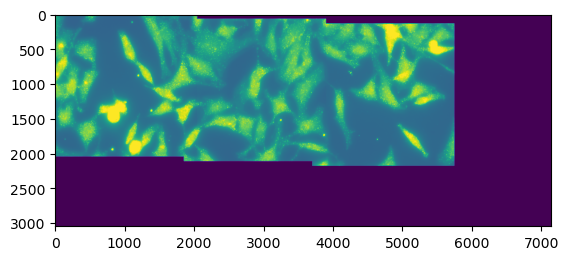

In [22]:
from matplotlib import pyplot as plt
from matplotlib import pyplot as plt
from skimage.exposure import rescale_intensity


input_img = np.amax(final_masks, 0)
pa_ch1, pb_ch1 = np.percentile(input_img, (1, 99))
input_img = rescale_intensity(input_img, in_range=(pa_ch1, pb_ch1), out_range=np.uint8)

plt.imshow(input_img)
